In [6]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
# JSAnimation import available at https://github.com/jakevdp/JSAnimation
from JSAnimation import IPython_display
from matplotlib import animation
from scipy import integrate
from scipy import optimize

Populating the interactive namespace from numpy and matplotlib


C:\Users\oldyu\Miniconda3\envs\python3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
#Defining Fixed-point iteration function
def FixedPoint_Animation( f, pini, Nmax, xmin, xmax ):
    g = lambda x: x-f(x)
    #Initial condition
    pi = [pini,]
    px = [pini,pini,]
    py = [0,]
    #Iterations
    for n in np.arange(Nmax+3):
        pi.append( g(pi[n]) )
        px.append( g(pi[n]) )
        px.append( g(pi[n]) )
        py.append( g(pi[n]) )
        py.append( g(pi[n]) )
    
    py.append( g(pi[n+1]) )
    pi = np.array( pi )
    px = np.array( px )
    py = np.array( py )
    
    print( "Result:", pi[-1])
    
    #Array X-axis
    X = np.linspace(xmin,xmax,100)
    
    #Initializing Figure
    fig = plt.figure( figsize=(7,7) )
    ax = fig.add_subplot(111)
    #Graphic iterations
    fixedpoint, = ax.plot( [], [], color="red", linewidth = 3 )
    #Function g
    ax.plot( X, g(X), color="green", linewidth = 2 )
    #Identity funcion
    ax.plot( X, X, color="blue", linewidth = 2 )
    ax.grid(True)
    ax.set_xlim( (xmin, xmax) )
    ax.set_ylim( (xmin, xmax) )
    ax.set_xlabel( "X axis" )
    ax.set_ylabel( "Y axis" )
    ax.set_title( "Fixed-Point iteration" )
        
    def init():
        fixedpoint.set_data([], [])
        return fixedpoint,
    
    def animate(i):
        #Setting new data
        fixedpoint.set_data( px[:2*i], py[:2*i] )
        ax.set_title( "Fixed-Point. Iteration %d"%i )
        return fixedpoint,
    
    return animation.FuncAnimation(fig, animate, init_func=init,frames=Nmax, interval=500, blit=True)

Result: 0.9999999890733635



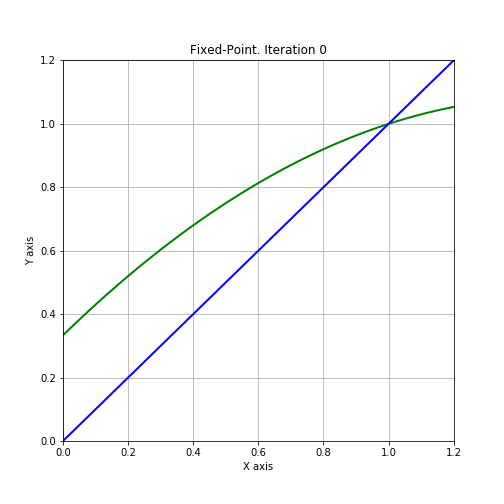
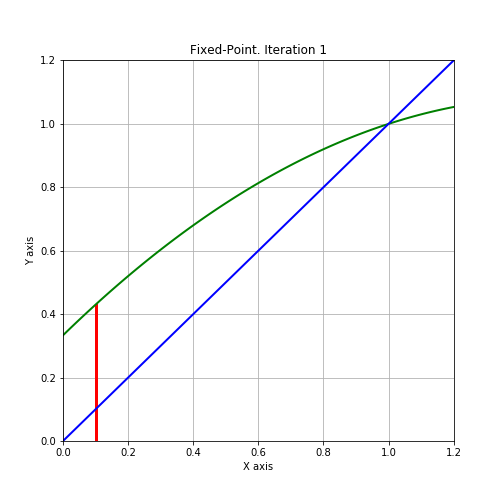
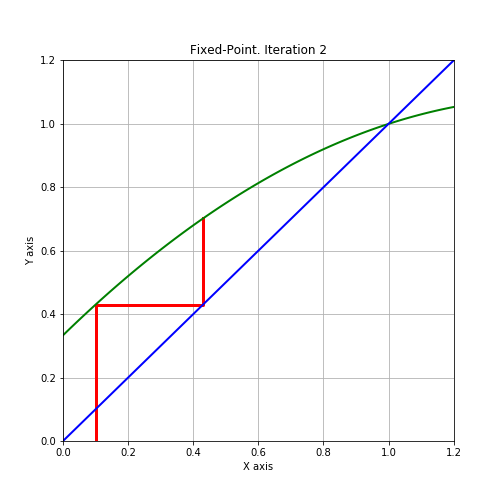
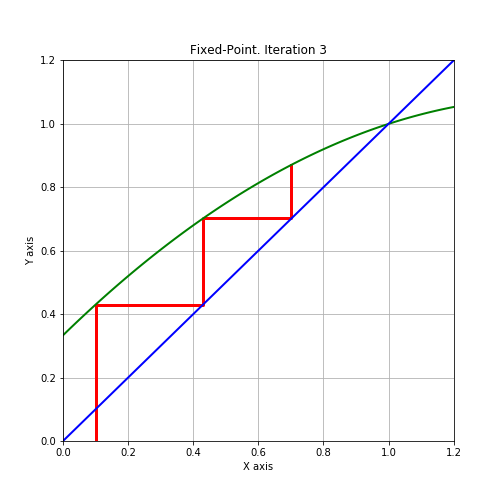
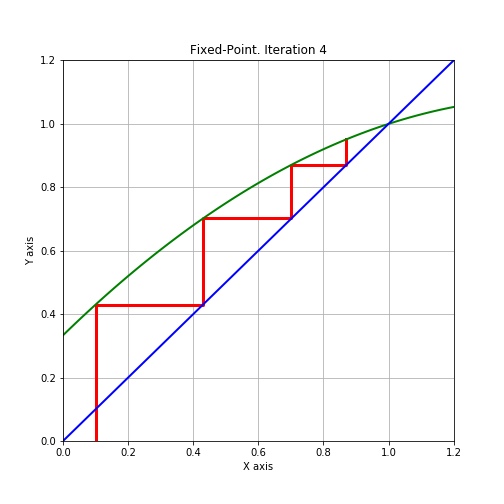
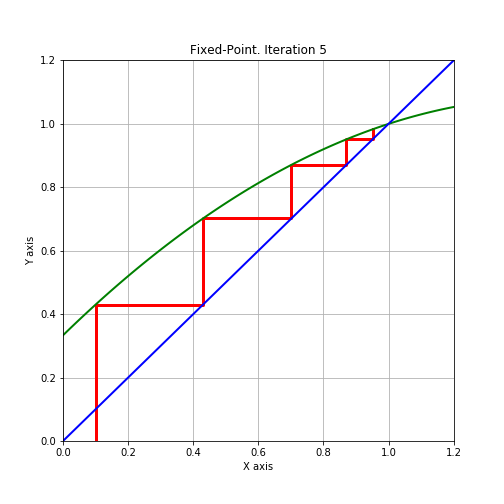
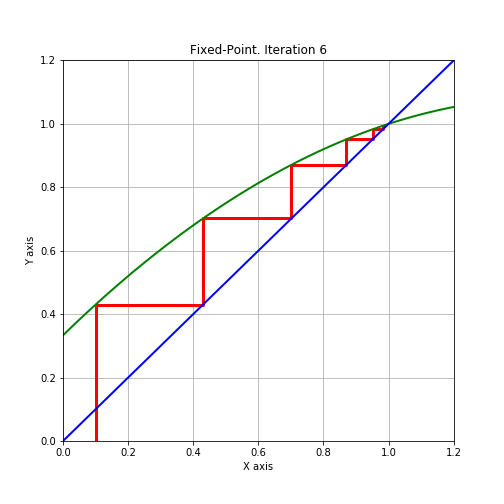
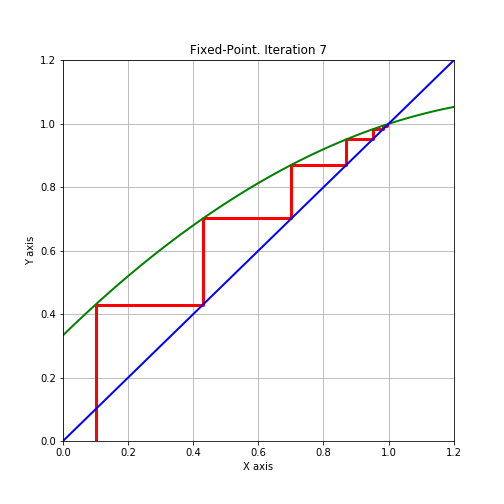
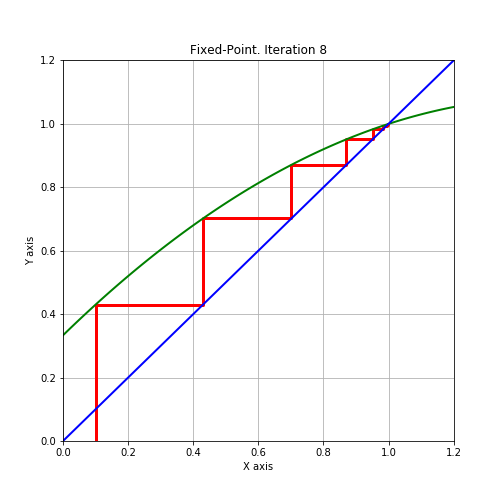
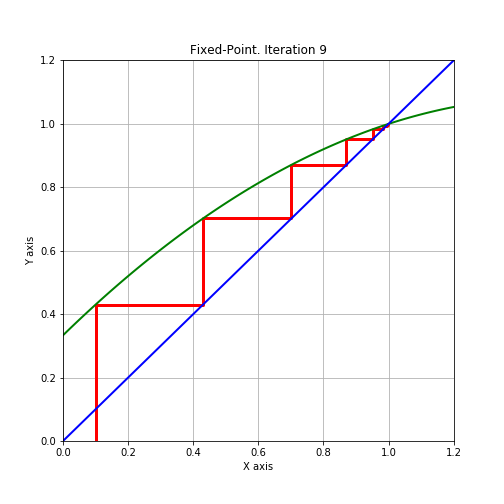
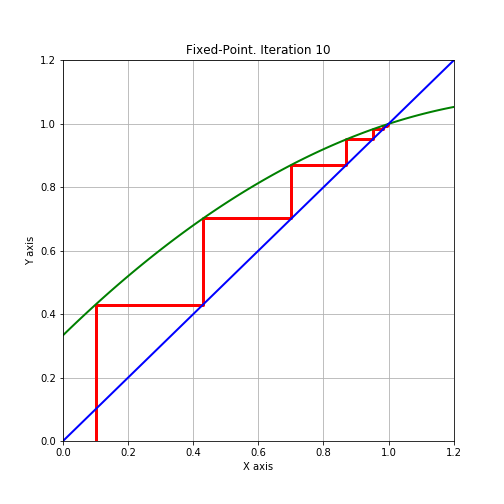
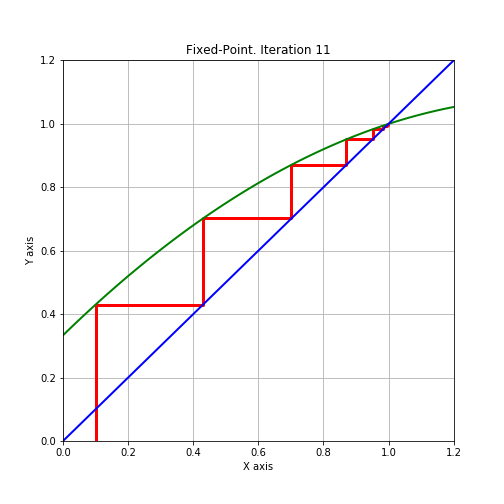
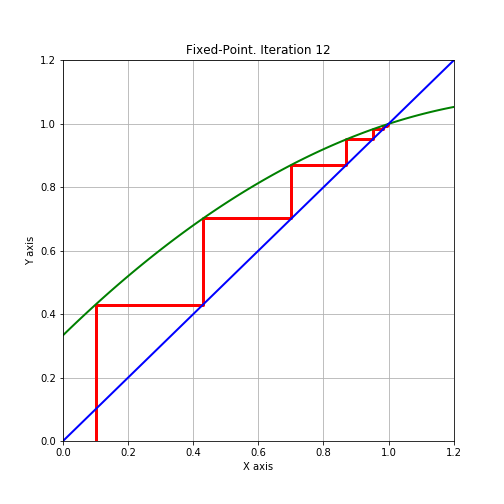
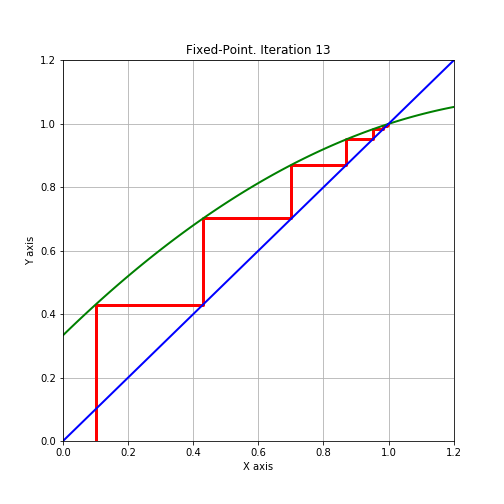
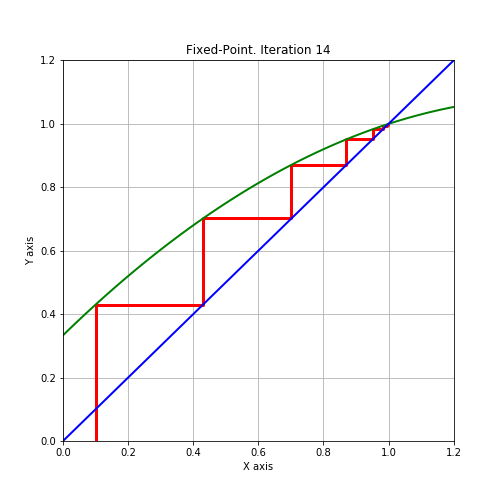

In [8]:
def f1(x):
    return (x**2-1)/3.0
FixedPoint_Animation( f1, pini = 0.1, Nmax = 15, xmin = 0, xmax = 1.2 )

Result: 0.7387845105929659



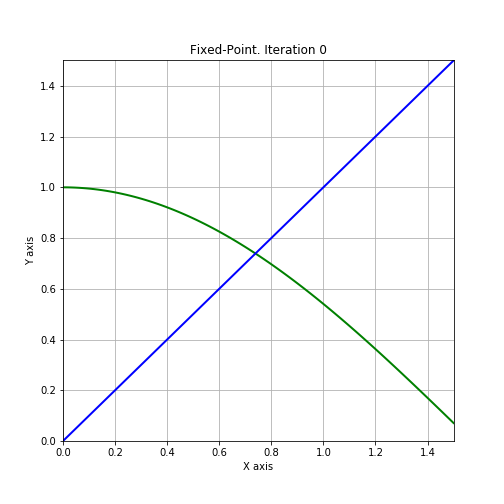
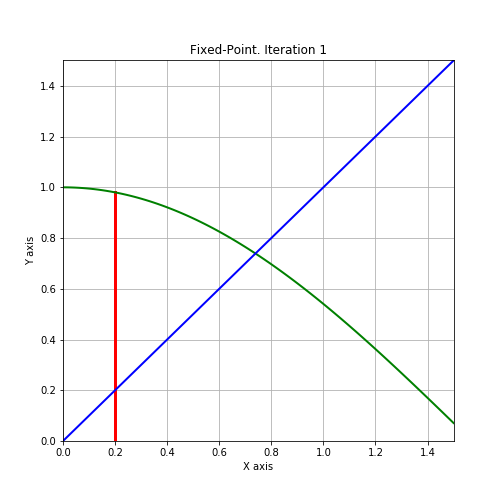
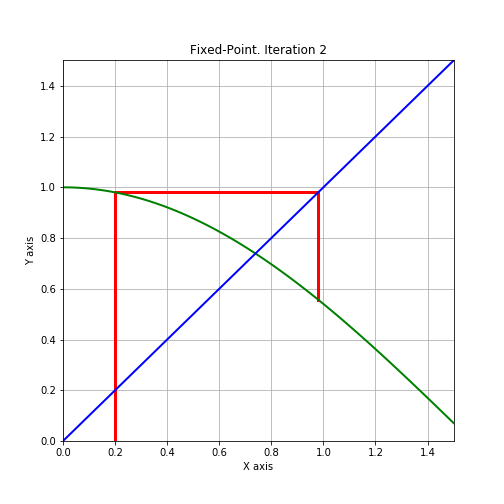
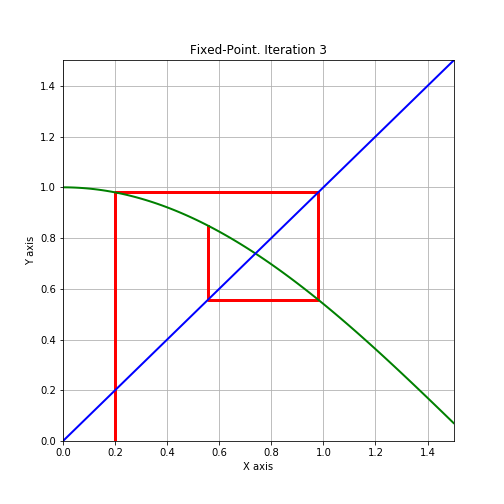
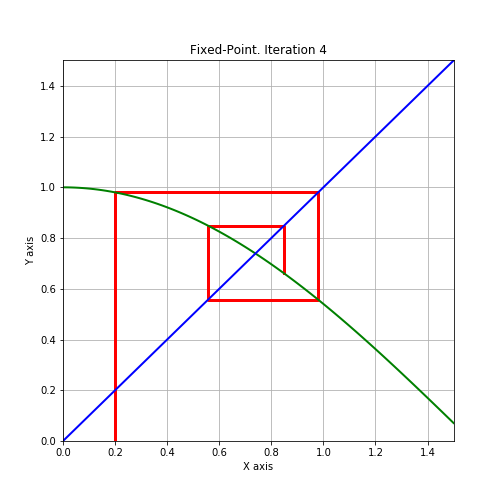
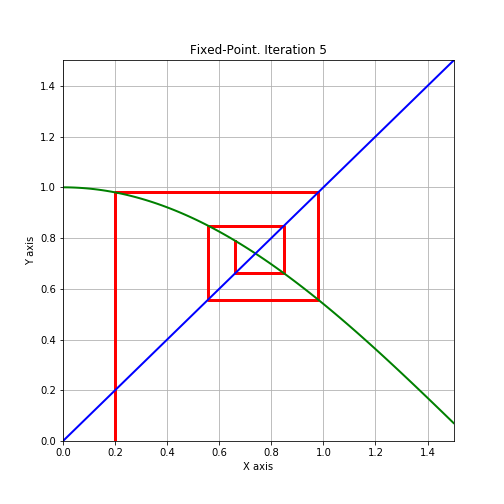
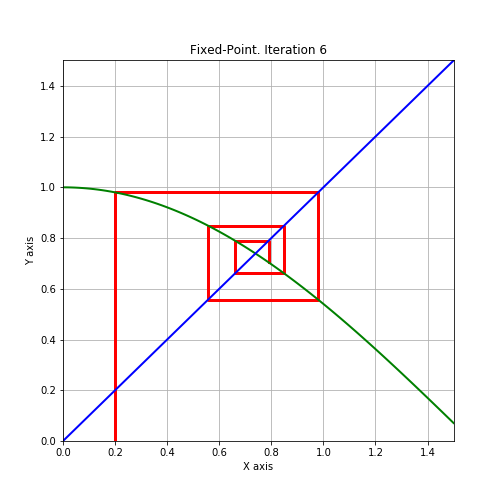
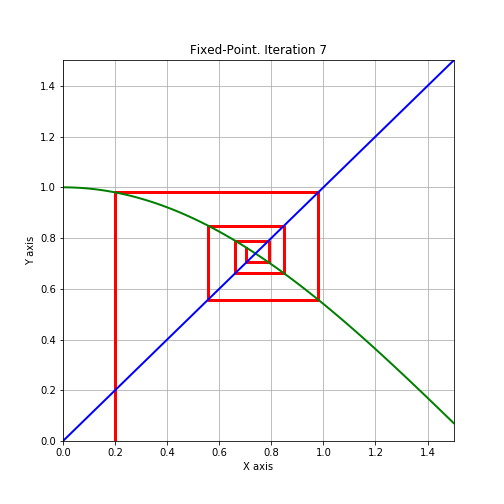
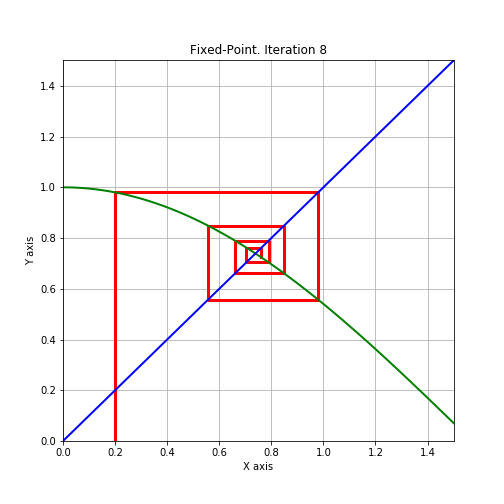
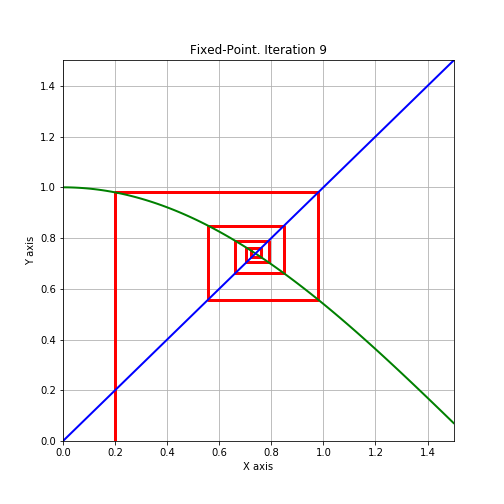
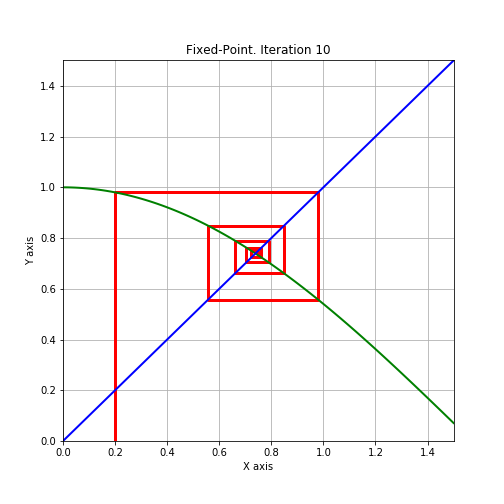
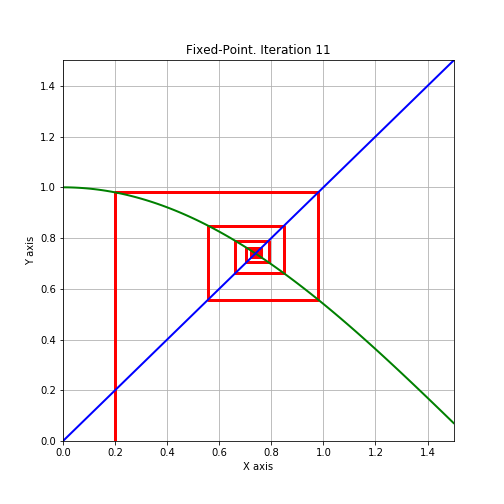
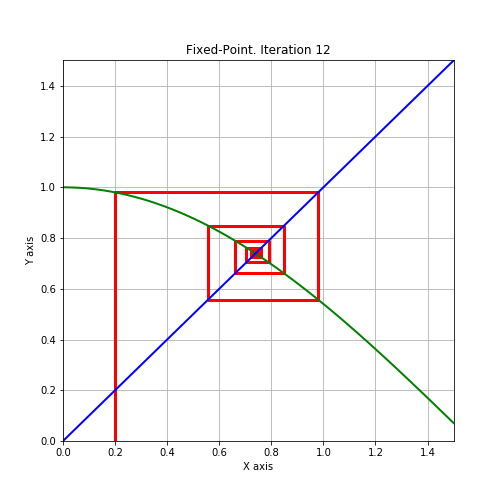
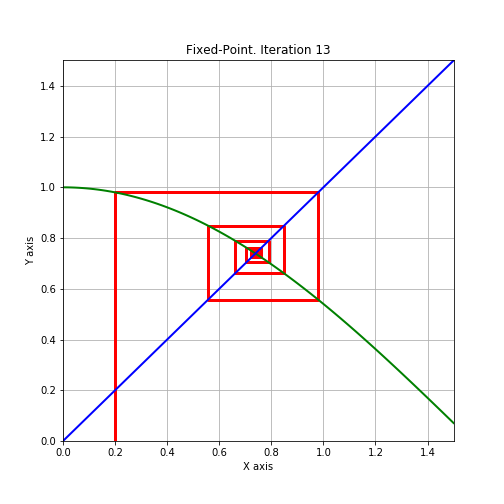
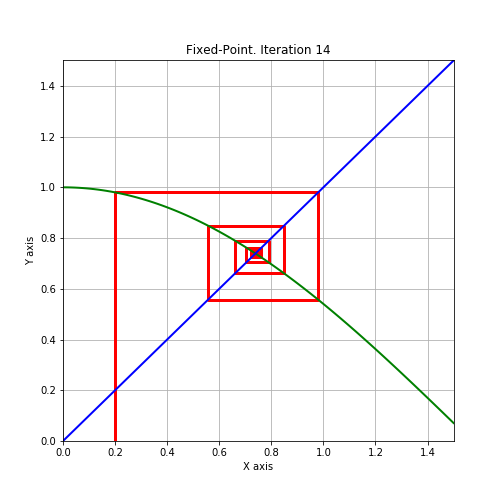

In [9]:
def f2(x):
    return x-np.cos(x)
FixedPoint_Animation( f2, pini = 0.2, Nmax = 15, xmin = 0, xmax = 1.5 )

In [12]:
#Defining Newton Method
def NewtonRaphson_Animation( f, fp, pini, Nmax, xmin, xmax ):
    #Initial condition
    p = [pini,]
    p_dash = []
    p_der = []
    #Iterations
    for n in np.arange(Nmax):
        p.append( p[n] - f(p[n])/fp(p[n]) )
        p_dash.append( p[n] )
        p_dash.append( p[n] )
        p_der.append( 0 )
        p_der.append( f(p[n]) )
    
    p = np.array( p )
    p_dash = np.array( p_dash )
    p_der = np.array( p_der )
    
    print( "Result:", p[-1])
    
    #Array X-axis
    X = np.linspace(xmin,xmax,100)
    
    #Initializing Figure
    fig = plt.figure( figsize=(7,7) )
    ax = fig.add_subplot(111)
    #Graphic iterations
    dash, = ax.plot( [], [], "--", color="gray", linewidth = 2 )
    derivative, = ax.plot( [], [], color="red", linewidth = 3 )
    #Function f
    ax.plot( X, f(X), color="green", linewidth = 2 )
    #Horizontal line
    ax.hlines( 0, xmin,xmax, color="black", lw = 2 )
    ax.grid(True)
    ax.set_xlim( (xmin, xmax) )
    ax.set_xlabel( "X axis" )
    ax.set_ylabel( "Y axis" )
    ax.set_title( "Fixed-Point iteration" )
        
    def init():
        dash.set_data([], [])
        derivative.set_data([], [])
        return dash, derivative
    
    def animate(i):
        #Setting new data
        dash.set_data( p_dash[:2*i+2], p_der[:2*i+2] )
        derivative.set_data( p_dash[2*i+1:2*i+3], p_der[2*i+1:2*i+3] )
        ax.set_title( "Newthon-Raphson Method. Iteration %d"%i )
        return dash, derivative
    
    return animation.FuncAnimation(fig, animate, init_func=init,frames=Nmax, interval=500, blit=True)

Result: 1.0



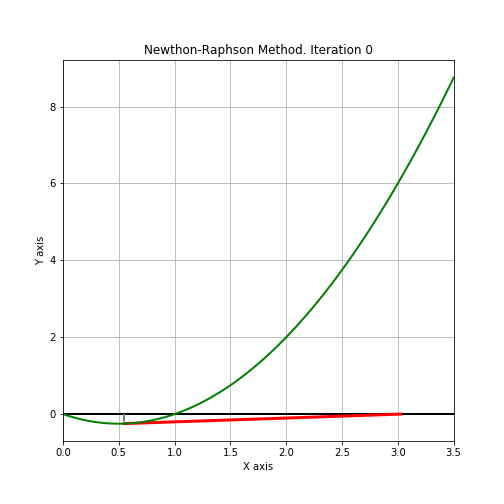
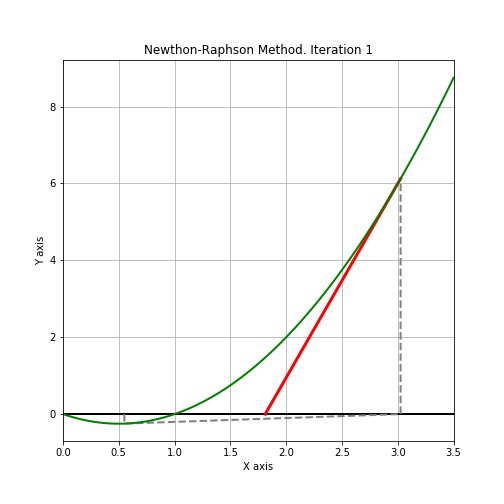
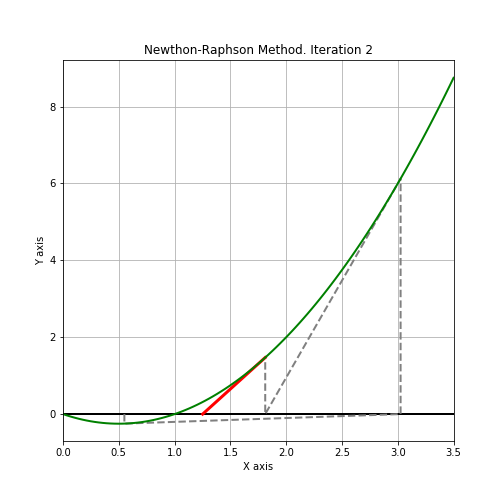
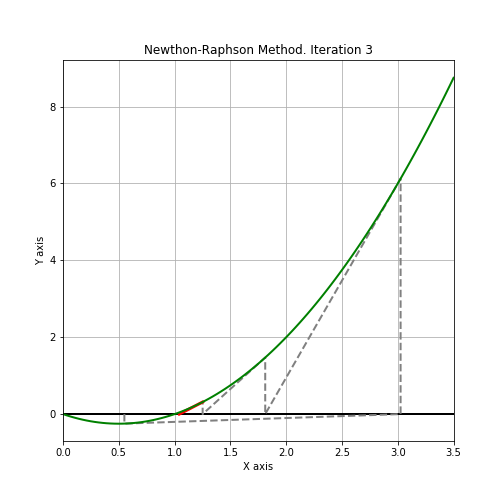
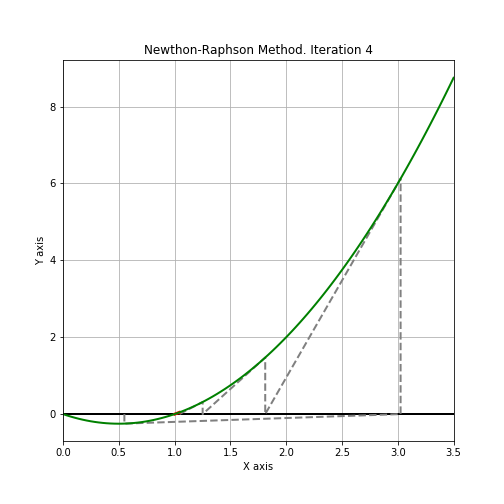
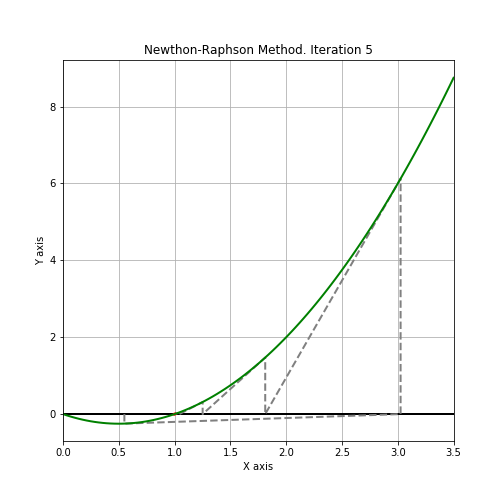
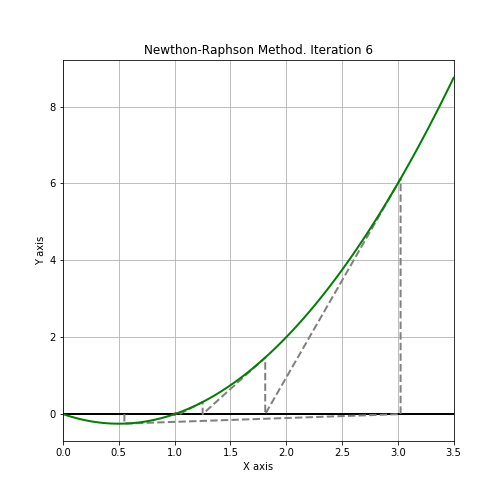
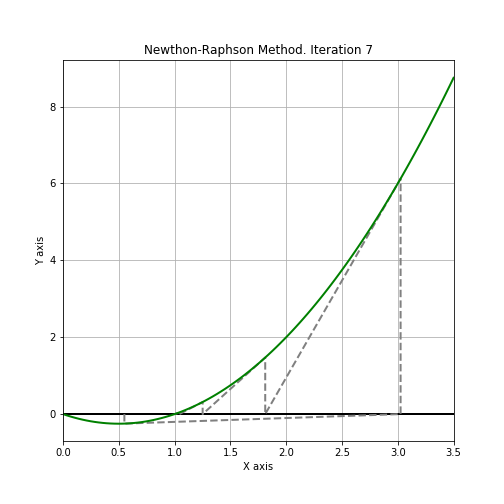
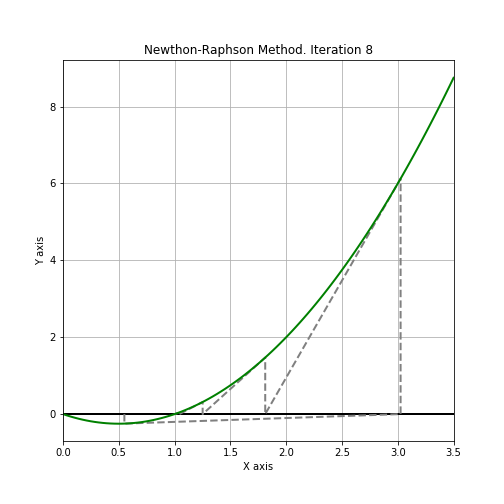
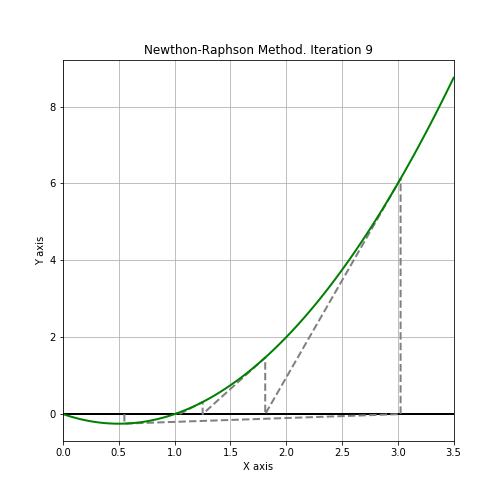

In [13]:
#Defining the function
def f(x): 
    return x**2-x
#Defining the derivative
def df(x): 
    return 2*x-1
#Calculating root
NewtonRaphson_Animation( f, df, pini = 0.55, Nmax = 10, xmin = 0, xmax = 3.5 )

Result: 1.0



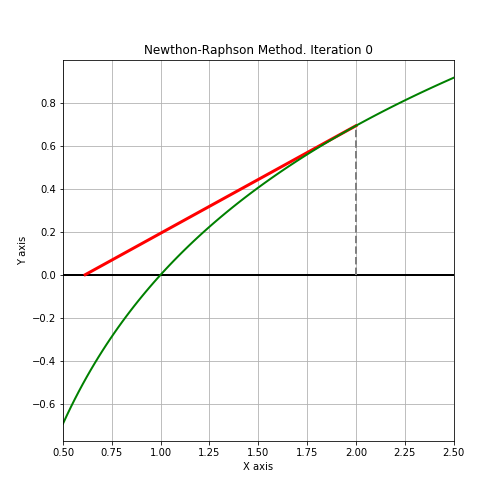
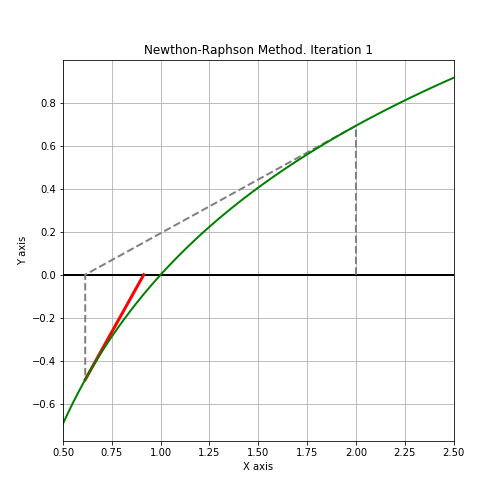
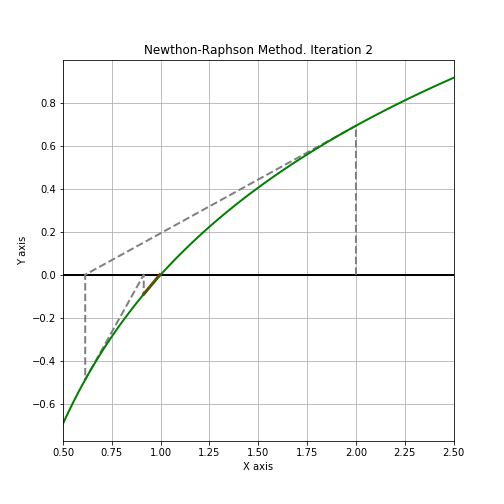
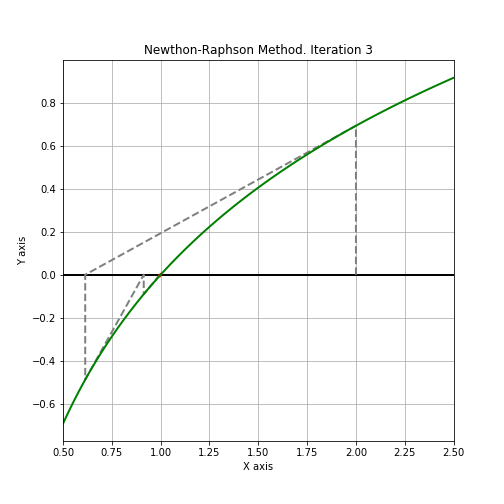
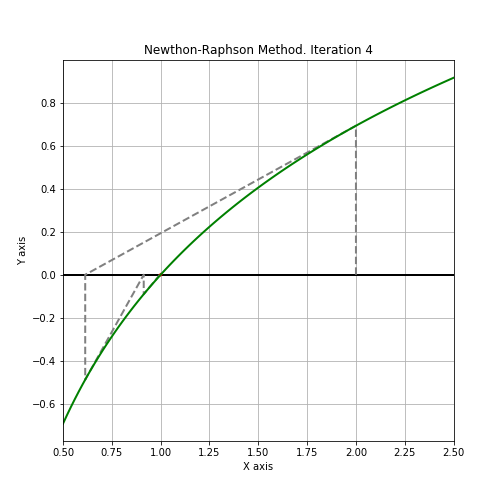
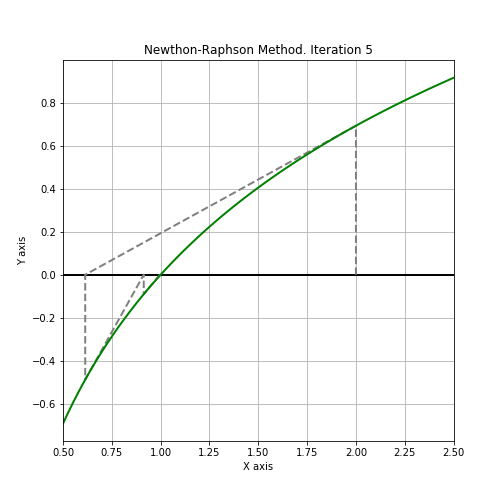
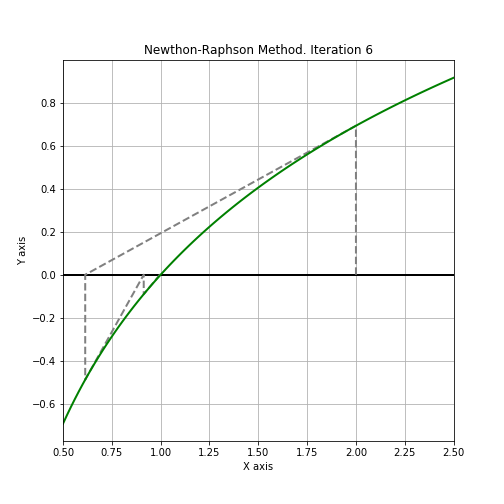
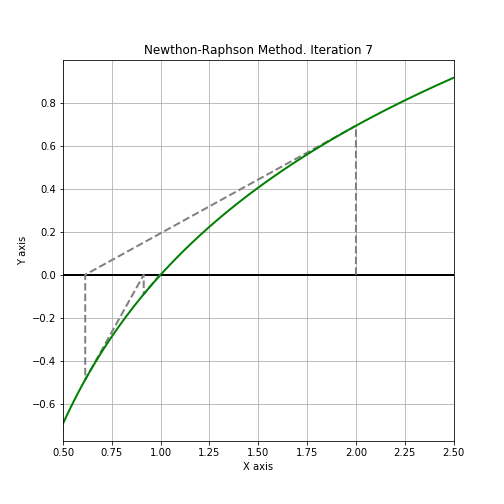
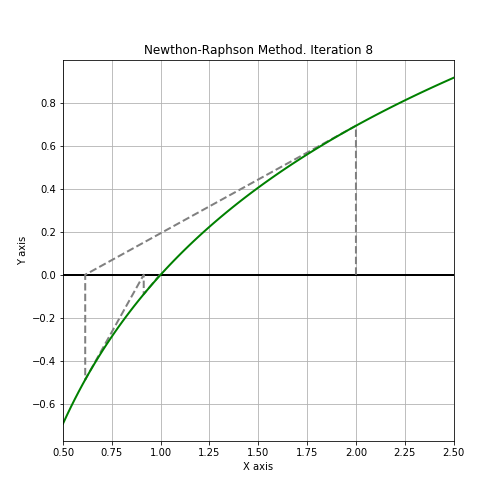
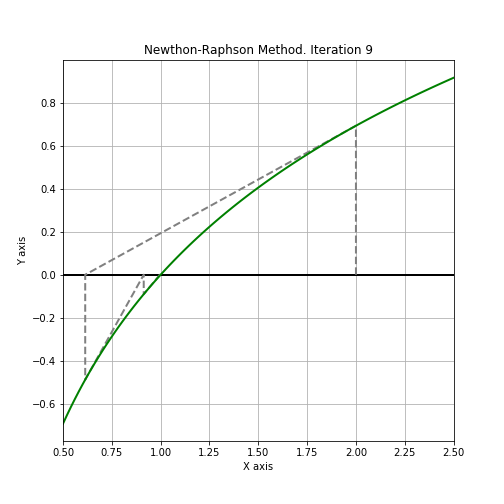

In [18]:
def f(x):
    return np.log(x)

#Defining the derivative
def df(x): 
    return 1/x

#Calculating root
NewtonRaphson_Animation( f, df, pini = 2, Nmax = 10, xmin = 0.5, xmax = 2.5 )


In [19]:
from scipy.misc import derivative
import matplotlib.pyplot as plt
from ipywidgets import widgets

In [20]:
x_n = 2
x = np.linspace(0.2, 2.2, 500)

def f(x):
    return np.log(x)

def x_next(f, x, x_n):
    slope = derivative(f, x_n, dx=0.1)
    return x_n - f(x_n) / slope

for n in range(6):
    print('x_{} = {:.6f}'.format(n + 1, x_n))
    x_n = x_next(f, x, x_n)

x_1 = 2.000000
x_2 = 0.614862
x_3 = 0.911249
x_4 = 0.995599
x_5 = 0.999975
x_6 = 1.000000


In [24]:
x = np.linspace(0.2, 2.2, 500)

def f(x):
    return np.log(x)

def f_line(f, x, x_n):
    slope = derivative(f, x_n, dx=0.1)
    x_nn = x_n - f(x_n) / slope 
    return slope * (x - x_n) + f(x_n), x_nn

def update_plot(order):
    x_n = 2
    ax.clear()
    ax.plot(x, f(x), label=r'$\ln(x)$')
    ax.axhline(0, color='gray', lw=0.5)

    for i in range(0, order):

        if i >= 1:
            ax.plot(x, f_l, '--', lw=1)
        
        ax.plot(x_n, f(x_n), 'kd', label=r'$f(x_{}={:.2f})={:.3f}$'.format(i + 1, x_n, f(x_n)))
        ax.vlines(x_n, 0, f(x_n), color='black', linestyle=':', lw=1)
        f_l, x_n = f_line(f, x, x_n)

        
    plt.setp(ax, xticks=[0, 1, 2], xticklabels=['0', '1', '2'],
             yticks=[-1, 0, 1], yticklabels=['-1', '0', '-1'])
    ax.set_ylim(-1, 1)
    ax.set_xlim(0, 2.2)
    ax.legend(loc=4)
    plt.show()

In [30]:
import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt
from ipywidgets import widgets
%matplotlib nbagg

<IPython.core.display.Javascript object>


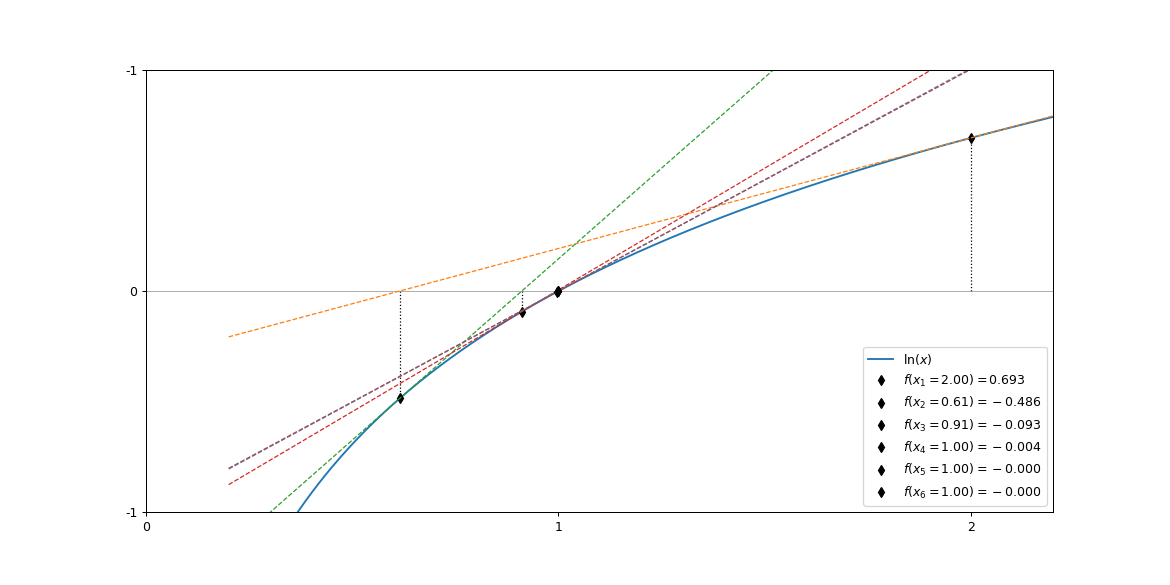

interactive(children=(IntSlider(value=1, description='order', max=6, min=1), Output()), _dom_classes=('widget-interact',))

In [31]:
fig, ax = plt.subplots(1, figsize=(13, 6.5))
order = widgets.IntSlider(min=1, max=6, value=1, description='order')
widgets.interactive(update_plot, order=order)